In [7]:
import os.path as op

import anaconfig

import montetracko.lhcb as mtb
import montetracko.lhcb.category as mtbc

from Preprocessing.preprocessing import load_dataframes
from Preprocessing.particle_fitting_metrics import compute_particle_line_metrics_dataframe

from utils.plotutils.plotools import save_fig

from utils.plotutils.plotconfig import configure_matplotlib
import matplotlib.pyplot as plt
import numpy as np

configure_matplotlib()


In [5]:
hits_particles, particles = load_dataframes(
    indir="/scratch/acorreia/minbias-sim10b-xdigi-nospillover/92",
)


Text(0, 0.5, 'Abundance')

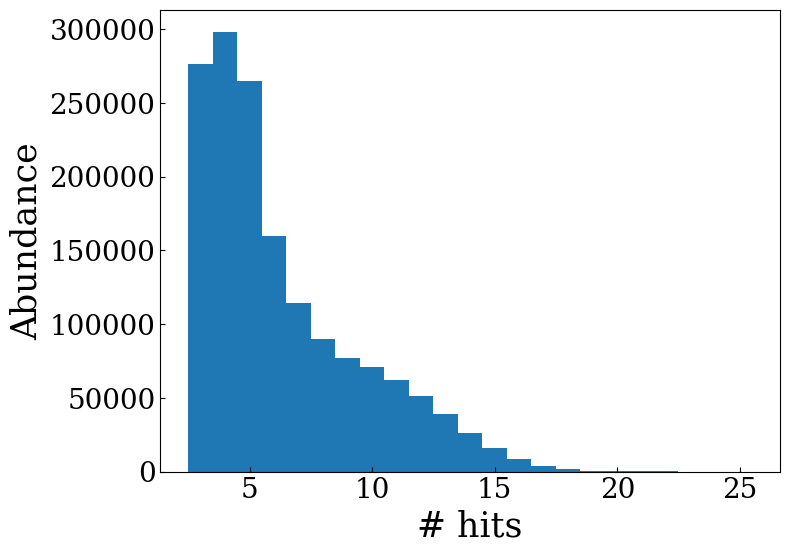

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(particles["nhits_velo"], bins=np.arange(3, 27) - 0.5)
ax.set_xlabel("# hits")
ax.set_ylabel("Abundance")

In [16]:
n_particles_velo = (particles["nhits_velo"] >= 3).sum()
print(f"{n_particles_velo=:,}")

n_particles_velo=1,561,846


$f \times \sum_{n = 3}^{26} \frac{1}{n} = n_{\text{hits}}$

In [31]:
nhits_max = 10

In [32]:
factor = 1 / np.arange(3, nhits_max)
norm = n_particles_velo / factor.sum()

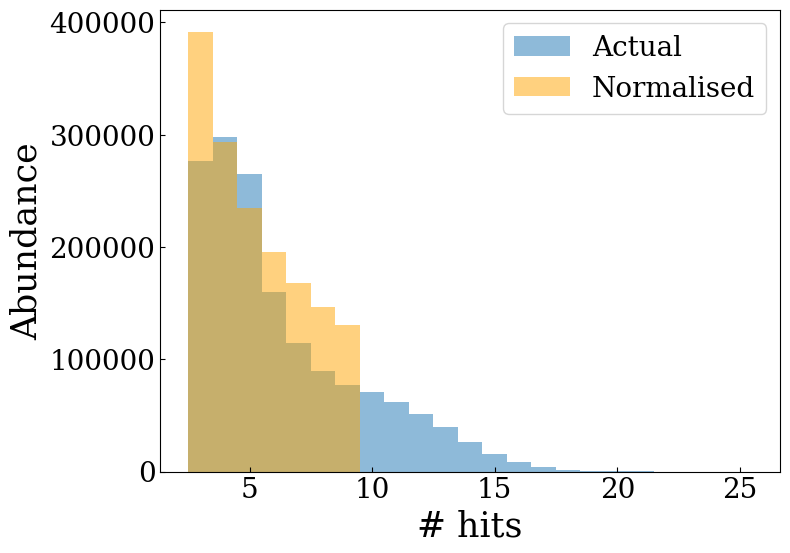

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(
    particles["nhits_velo"],
    bins=np.arange(3, 27) - 0.5,
    label="Actual",
    alpha=0.5,
)

ax.bar(
    x=np.arange(3, nhits_max),
    height=norm * factor,
    width=1.0,
    color="orange",
    label="Normalised",
    alpha=0.5,
)

ax.set_xlabel("# hits")
ax.set_ylabel("Abundance")
ax.legend()